### Random Forest & Features Importance Lab

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Data Set Characteristics:  
A. Abadie (2003), “Semiparametric Instrumental Variable Estimation of Treatment Response Models,” Journal of Econometrics 113, 231-263.
http://zmjones.com/static/causal-inference/abadie-jep-2003.pdf
    
    Number of Instances: 9275
    
    Attribute Information
        e401k = 1 if eligble for 401(k)
        inc   = annual income, $1000s
    marr  = 1 if married
    male  = 1 if male respondent
    age   = in years
    fsize = family size
    nettfa= net total fin. assets, $1000
        p401k = 1 if participate in 401(k)
        pira  = 1 if have IRA
        incsq = inc^2
        agesq = age^2



### 1. Instructions

1. Read the 401ksubs.csv data into Pandas.
2. Explore the data by sorting, plotting, group_by, and any other ideas/techniques you have been using.

In [3]:
data = pd.read_csv('../Datasets/401ksubs.csv') 
data.head(2)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.17,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.23,0,1,35,1,154.000,1,0,3749.1130,1225


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275 entries, 0 to 9274
Data columns (total 11 columns):
e401k     9275 non-null int64
inc       9275 non-null float64
marr      9275 non-null int64
male      9275 non-null int64
age       9275 non-null int64
fsize     9275 non-null int64
nettfa    9275 non-null float64
p401k     9275 non-null int64
pira      9275 non-null int64
incsq     9275 non-null float64
agesq     9275 non-null int64
dtypes: float64(3), int64(8)
memory usage: 797.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
e401k,9275.0,0.392129,0.488252,0.0000,0.0000,0.000,1.0000,1.000
inc,9275.0,39.254641,24.090002,10.0080,21.6600,33.288,50.1600,199.041
marr,9275.0,0.628571,0.483213,0.0000,0.0000,1.000,1.0000,1.000
male,9275.0,0.204420,0.403299,0.0000,0.0000,0.000,0.0000,1.000
age,9275.0,41.080216,10.299517,25.0000,33.0000,40.000,48.0000,64.000
fsize,9275.0,2.885067,1.525835,1.0000,2.0000,3.000,4.0000,13.000
nettfa,9275.0,19.071675,63.963838,-502.3020,-0.5000,2.000,18.4495,1536.798
p401k,9275.0,0.276226,0.447154,0.0000,0.0000,0.000,1.0000,1.000
pira,9275.0,0.254340,0.435513,0.0000,0.0000,0.000,1.0000,1.000
incsq,9275.0,2121.192483,3001.469424,100.1601,469.1556,1108.091,2516.0255,39617.320


In [6]:
# sns.heatmap(data, annot=True, fmt="d")

In [7]:
data.corr().T

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
e401k,1.000000,0.268178,0.080843,-0.027641,0.031526,0.012015,0.143950,0.769170,0.118643,0.206618,0.017526
inc,0.268178,1.000000,0.362008,-0.069871,0.105638,0.110170,0.376586,0.270833,0.364354,0.940161,0.087305
marr,0.080843,0.362008,1.000000,-0.363950,0.059047,0.564814,0.075039,0.085636,0.116925,0.280060,0.054500
male,-0.027641,-0.069871,-0.363950,1.000000,-0.120297,-0.320678,-0.018132,-0.024949,-0.036361,-0.053715,-0.116235
age,0.031526,0.105638,0.059047,-0.120297,1.000000,-0.030536,0.203906,0.025977,0.238557,0.097584,0.992619
fsize,0.012015,0.110170,0.564814,-0.320678,-0.030536,1.000000,-0.031506,0.014296,-0.043629,0.079570,-0.055924
nettfa,0.143950,0.376586,0.075039,-0.018132,0.203906,-0.031506,1.000000,0.187392,0.345917,0.407568,0.203703
p401k,0.769170,0.270833,0.085636,-0.024949,0.025977,0.014296,0.187392,1.000000,0.153033,0.222113,0.015740
pira,0.118643,0.364354,0.116925,-0.036361,0.238557,-0.043629,0.345917,0.153033,1.000000,0.322805,0.233543
incsq,0.206618,0.940161,0.280060,-0.053715,0.097584,0.079570,0.407568,0.222113,0.322805,1.000000,0.082991


In [8]:
data.groupby(['male', 'marr'])['age'].agg(np.mean).reset_index()

,male,marr,age
0,0,0,41.622180
1,0,1,41.742069
2,1,0,38.250367
3,1,1,39.619850


In [9]:
data.groupby(['male', 'p401k'])['age'].agg(np.mean).reset_index()

,male,p401k,age
0,0,0,41.569164
1,0,1,42.062500
2,1,0,38.463225
3,1,1,39.143154


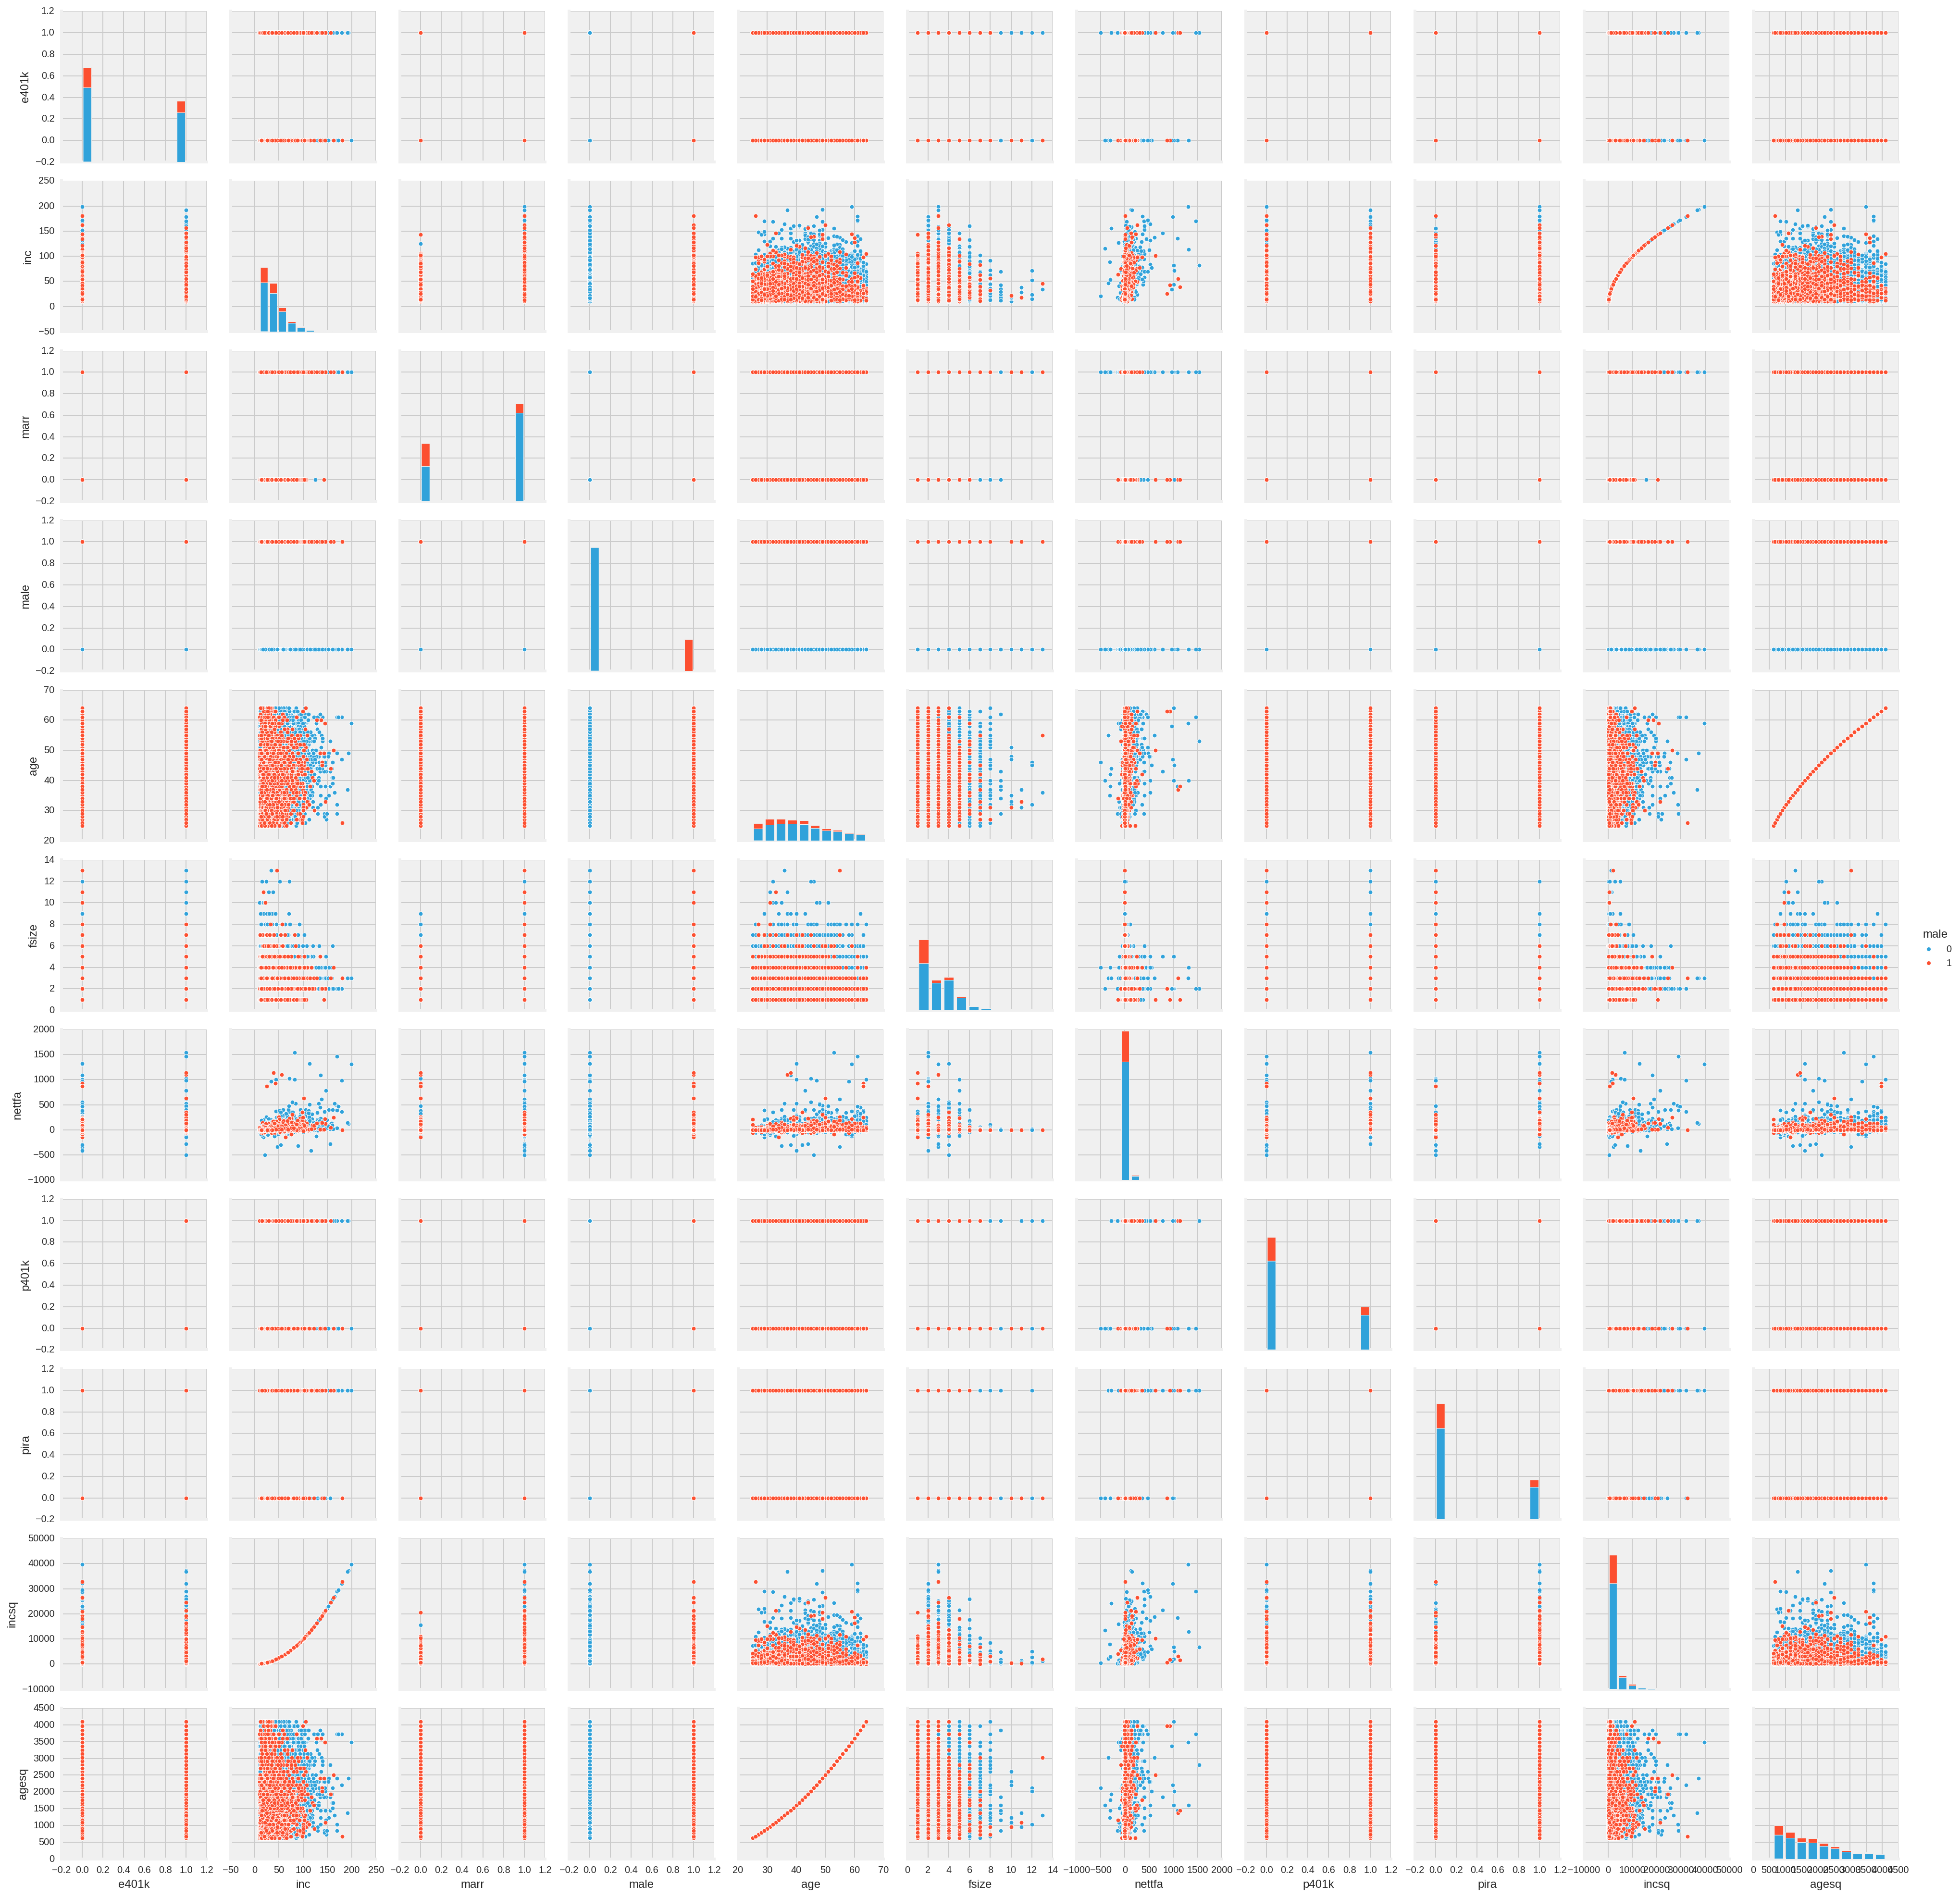

In [10]:
sns.pairplot(data, hue='male', kind='scatter')

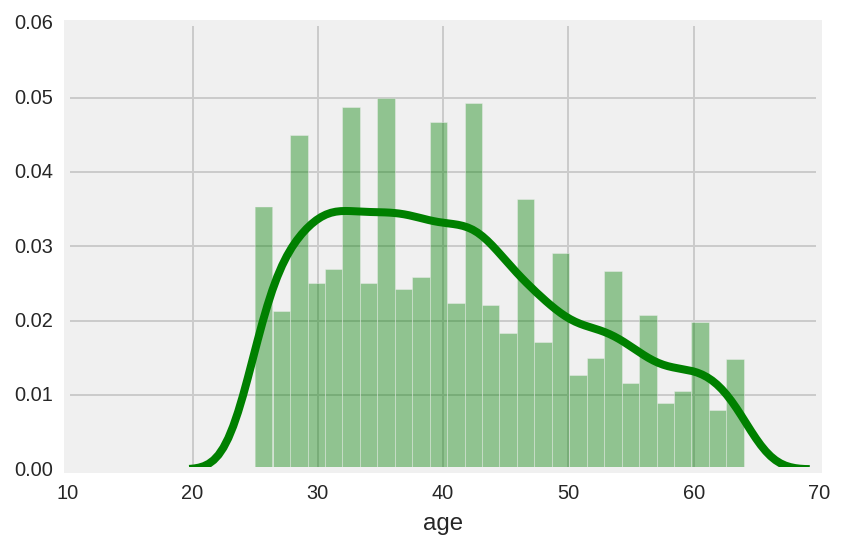

In [11]:
sns.distplot(data['age'], color='g')

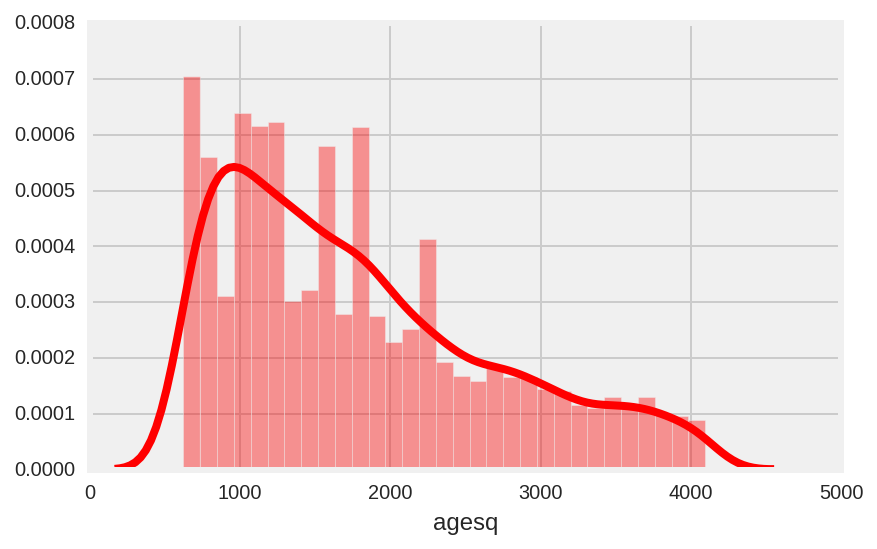

In [12]:
sns.distplot(data['agesq'], color='r')

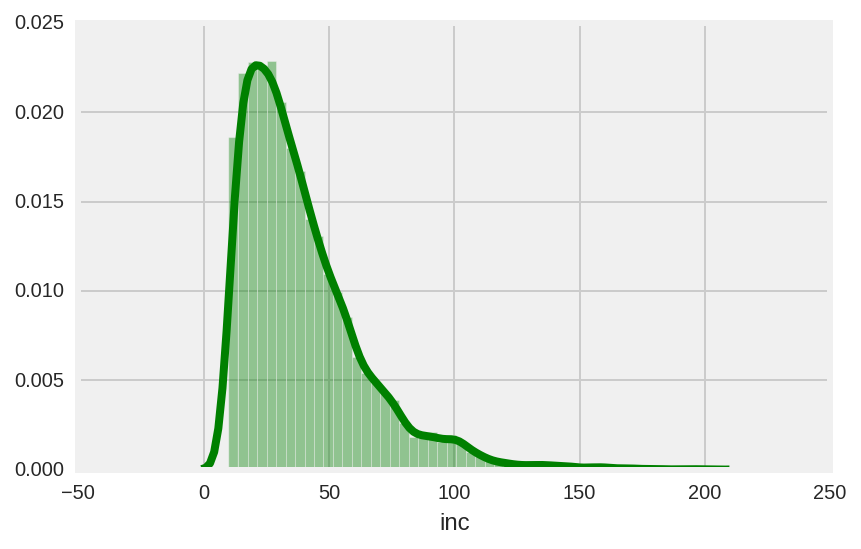

In [13]:
sns.distplot(data['inc'], color='g')

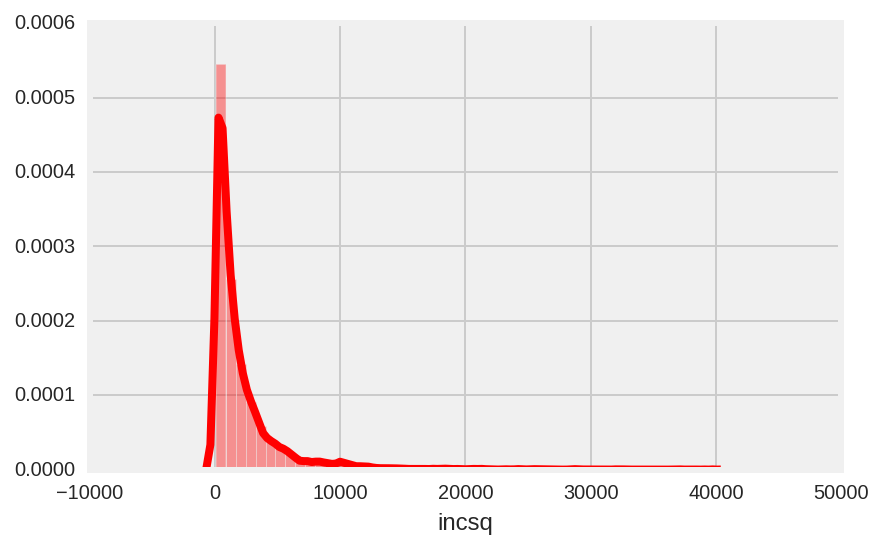

In [14]:
sns.distplot(data['incsq'], color='r')

### 2.Build a classification tree in scikit-learn
### 2.2 Classification
y = male 

X = all the columns except male age square and income square


In [15]:
## Define y
    y = data['male']

    ## Define X (exclude columns 'male', 'incsq' ,'agesq') on X
    columns_ = data.columns.tolist()
    exclude_cols = ['male', 'incsq' ,'agesq']
    X = data[[i for i in columns_ if i not in exclude_cols]]

    ## Print shapes of y and X
    print y.shape, X.shape

(9275,) (9275, 8)


### 2.3 Split data into train/test (70/30)

In [16]:
## Train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(6492, 8) (6492,)
(2783, 8) (2783,)


### 2.4 Build 3 models with different parameters for max_depth: max_depth=1, max_depth=2, max_depth=3


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)

### 2.5 Cross-validate the accuracy scores of each of the models, use cv=5

In [18]:
dtc1.fit(X_train, y_train)
dtc2.fit(X_train, y_train)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
from sklearn.cross_validation import cross_val_score
dtc1_scores = cross_val_score(dtc1, X_train, y_train, cv=5)
dtc2_scores = cross_val_score(dtc2, X_train, y_train, cv=5)
dtc3_scores = cross_val_score(dtc3, X_train, y_train, cv=5)

print dtc1_scores, np.mean(dtc1_scores)
print dtc2_scores, np.mean(dtc2_scores)
print dtc3_scores, np.mean(dtc3_scores)


[ 0.82755966  0.81755196  0.81664099  0.81124807  0.80431433] 0.815463002831
[ 0.83525789  0.8321786   0.83281972  0.81587057  0.80970724] 0.825166804855
[ 0.83910701  0.81909161  0.82742681  0.81587057  0.81278891] 0.822856980183


### 2.5 Now perform a gridsearch, n_jobs=-1, cv=5, verbose=1

In [20]:
## Define your DecisionTreeClassifier, search parameters, gridsearch
from sklearn.grid_search import GridSearchCV

## Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier()

## Search parameters
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

In [21]:
## Fit, takes 6 min in my computer
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [22]:
## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs.best_score_


best estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=5, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


best parameters {'max_features': 5, 'min_samples_split': 3, 'max_depth': 3}


best score 0.826709796673


In [23]:
## Predict
y_pred= dtc_gs.predict(X_test)
print y_pred.shape, y_test.shape


(2783,) (2783,)


### 2.6 Visualize the classification tree USING the "best" parameteres

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

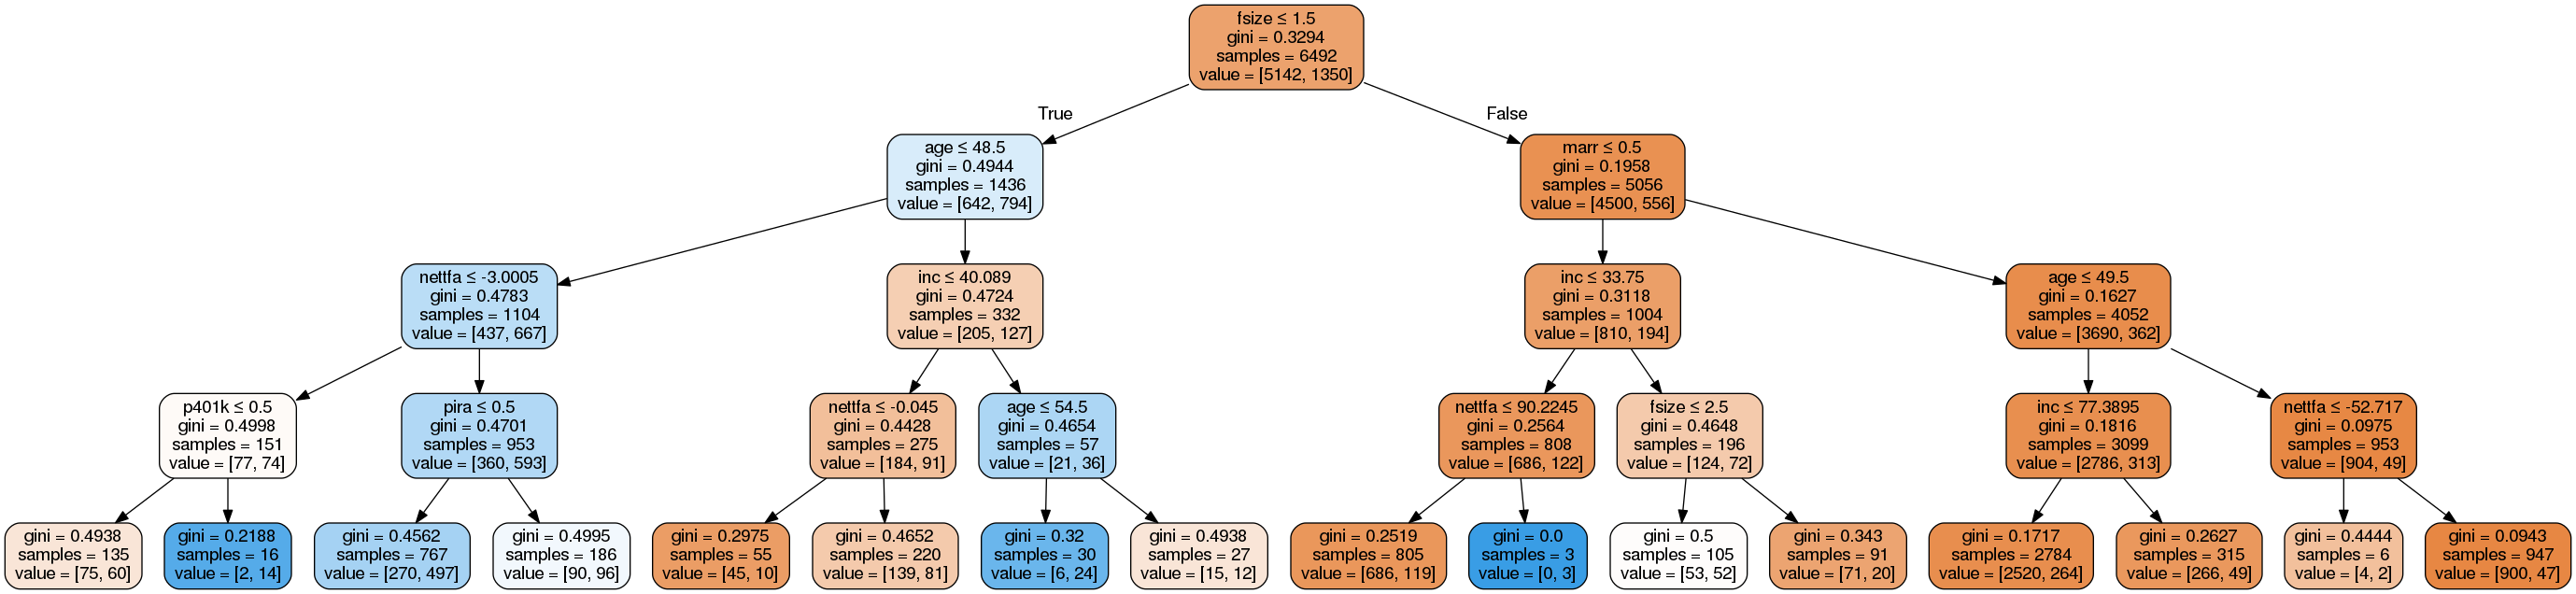

In [30]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best= DecisionTreeClassifier(max_features= None, min_samples_split= 25, max_depth= 4)
                                    

## Fit the best estimators (X_train, y_train)
dctc_best.fit(X_train, y_train)


## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [31]:
## Print Feature importances
feature_importance = pd.DataFrame({ 'feature':X.columns, 
                                   'importance':dctc_best.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
4,fsize,0.819289
3,age,0.059213
1,inc,0.046615
2,marr,0.031886
5,nettfa,0.023704
6,p401k,0.009737
7,pira,0.009555
0,e401k,0.000000


In [32]:
## Print a classification report
from sklearn.metrics import classification_report
cls_rep = classification_report(y_test, y_pred)
print cls_rep 

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      2237
          1       0.59      0.42      0.50       546

avg / total       0.82      0.83      0.82      2783



## 3. Random Forest Classification

### 3.1 Build 3 models with different parameters for max_depth: max_depth=1, max_depth=2, max_depth=3, and n_estimators=10, random_state=1, n_jobs=1

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=10,random_state=1,n_jobs=1,max_depth=1)
rfc2 = RandomForestClassifier(n_estimators=10,random_state=1,n_jobs=1,max_depth=2)
rfc3 = RandomForestClassifier(n_estimators=10,random_state=1,n_jobs=1,max_depth=3)


In [35]:
## Fit the models

rfc1.fit(X_train,y_train)
rfc2.fit(X_train,y_train)
rfc3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### 3.2 Cross-validate the accuracy scores of each of the models and compare to the decision tree, cv=5

In [36]:
rfc1_scores = cross_val_score(rfc1, X_train, y_train, cv=5)
rfc2_scores = cross_val_score(rfc2, X_train, y_train, cv=5)
rfc3_scores = cross_val_score(rfc3, X_train, y_train, cv=5)

print rfc1_scores, np.mean(rfc1_scores)
print rfc2_scores, np.mean(rfc2_scores)
print rfc3_scores, np.mean(rfc3_scores)

[ 0.79214781  0.79214781  0.79198767  0.79198767  0.79198767] 0.792051726408
[ 0.79214781  0.79214781  0.79198767  0.79198767  0.79198767] 0.792051726408
[ 0.79291763  0.80754426  0.81278891  0.81664099  0.80739599] 0.807457555949


### 3.3 Now perform a gridsearch

In [37]:
## Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
    'min_samples_leaf':np.linspace(1,101,20),
    'n_estimators':[100]
}

## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [38]:
# fit, it takes 4.7 min in my computer to run this gridsearch
rf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None], 'min_samples_leaf': array([   1.     ,    6.26316,   11.52632,   16.78947,   22.05263,
         27.31579,   32.57895,   37.84211,   43.10526,   48.36842,
         53.63158,   58.89474,   64.15789,   69.42105,   74.68421,
         79.94737,   85.21053,   90.47368,   95.73684,  101.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [43]:
## Print best estimator, best parameters, and best score
rfc_best_estimator = rf_gs.best_estimator_
print "best estimator", rfc_best_estimator

print "\n==========\n"
rfc_best_param = rf_gs.best_params_
print "best parameters",  rfc_best_param 

print "\n==========\n"
print "best score", rf_gs.best_score_

best estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=5, max_leaf_nodes=None,
            min_samples_leaf=11.526315789473685, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


best parameters {'max_features': 5, 'n_estimators': 100, 'max_depth': 3, 'min_samples_leaf': 11.526315789473685}


best score 0.830098582871


In [52]:
## Print Feature importances
rf_best = RandomForestClassifier(max_features=5,n_estimators=100,max_depth=3,min_samples_leaf=11.526315789473685)

rf_best.fit(X_train,y_train)

feature_importance = pd.DataFrame({ 'feature':X.columns, 
                                   'importance':rf_best.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
4,fsize,0.679770
2,marr,0.217699
3,age,0.049544
1,inc,0.037612
5,nettfa,0.010698
7,pira,0.003551
0,e401k,0.000671
6,p401k,0.000455


In [53]:
## Predict 
y_pred= rf_gs.predict(X_test)
print y_pred.shape, y_test.shape

(2783,) (2783,)


In [54]:
## Print classification report

cls_rep = classification_report(y_test, y_pred)
print cls_rep 

             precision    recall  f1-score   support

          0       0.88      0.91      0.89      2237
          1       0.57      0.49      0.53       546

avg / total       0.82      0.83      0.82      2783



### 3.4 Can you see any difference from the Decision tree classification in relation to feature importances and in the classification report. Do you think that it is overfitting?

A:

## 4. Random Forest Regression
y = inc

X = all the columns except income

In [55]:
## Define y
y = data['inc']

## Define X (exclude inc)
columns_ = data.columns.tolist()
exclude_cols = ['inc']
X = data[[i for i in columns_ if i not in exclude_cols]]

## Print shapes of y and X

print y.shape, X.shape

(9275,) (9275, 10)


In [56]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(6492, 10) (6492,)
(2783, 10) (2783,)


### 4.1 Build 3 models with different parameters for max_depth: max_depth=1, max_depth=2, max_depth=3, n_estimators=1000, criterion='mse', random_state =1, n_jobs=-1)


In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor(max_depth=1, n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
rfr2 = RandomForestRegressor(max_depth=2, n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
rfr3 = RandomForestRegressor(max_depth=3, n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

In [58]:
## Fit the models
rfr1.fit(X_train,y_train)
rfr2.fit(X_train,y_train)
rfr3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

### 4.2 Predict, print the MSE scores and R2 scores for each model for train and test 

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Model 1
## Hint:
rfr1_y_train_pred = rfr1.predict(X_train)
rfr1_y_test_pred = rfr1.predict(X_test)


In [60]:
## Model 2
rfr2_y_train_pred = rfr2.predict(X_train)
rfr2_y_test_pred = rfr2.predict(X_test)

In [61]:
## Model 3
rfr3_y_train_pred = rfr3.predict(X_train)
rfr3_y_test_pred = rfr3.predict(X_test)

In [62]:
print 'Model 1 Train MSE:', mean_squared_error(y_train,rfr1_y_train_pred)
print 'Model 2 Train MSE:', mean_squared_error(y_train,rfr2_y_train_pred)
print 'Model 3 Train MSE:', mean_squared_error(y_train,rfr3_y_train_pred)
print 'Model 1 Test MSE:', mean_squared_error(y_test,rfr1_y_test_pred)
print 'Model 2 Test MSE:', mean_squared_error(y_test,rfr2_y_test_pred)
print 'Model 3 Test MSE:', mean_squared_error(y_test,rfr3_y_test_pred)
print 'Model 1 Train R^2:', r2_score(y_train,rfr1_y_train_pred)
print 'Model 2 Train R^2:', r2_score(y_train,rfr2_y_train_pred)
print 'Model 3 Train R^2:', r2_score(y_train,rfr3_y_train_pred)
print 'Model 1 Test R^2:', r2_score(y_test,rfr1_y_test_pred)
print 'Model 2 Test R^2:', r2_score(y_test,rfr2_y_test_pred)
print 'Model 3 Test R^2:', r2_score(y_test,rfr3_y_test_pred)

Model 1 Train MSE: 189.716453196
Model 2 Train MSE: 52.9090645781
Model 3 Train MSE: 11.8912715334
Model 1 Test MSE: 226.044752129
Model 2 Test MSE: 69.2738456008
Model 3 Test MSE: 15.0935506135
Model 1 Train R^2: 0.660752527296
Model 2 Train R^2: 0.905388983723
Model 3 Train R^2: 0.978736246925
Model 1 Test R^2: 0.640686097105
Model 2 Test R^2: 0.88988438972
Model 3 Test R^2: 0.97600774834


### 4.3 Gridsearch 

In [63]:
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1) 

In [64]:
## Fit takes 20.6s to fit this in my computer
estimator_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   18.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [65]:
## Print best estimator, best parameters, and best score
print "best estimator", estimator_rfr.best_estimator_

print "\n==========\n"
print "best parameters",  estimator_rfr.best_params_ 

print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 5}


best score 0.871374106711


In [66]:
## Print Feature importances
best_rfr = estimator_rfr.best_estimator_

best_rfr.fit(X_train,y_train)

feature_importance = pd.DataFrame({ 'feature':X.columns, 
                                   'importance':best_rfr.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance

,feature,importance
8,incsq,0.713375
5,nettfa,0.151458
1,marr,0.076445
7,pira,0.030069
0,e401k,0.015681
6,p401k,0.008279
4,fsize,0.004475
9,agesq,0.000153
2,male,0.000065
3,age,0.000000


### 4.5 Fit and print MSE in train and test data, R2 in train and test data